In [6]:
# decision trees implementation 

import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV



In [7]:
#load titanic dataset 
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#preprocessing 
# Drop irrelevant columns 
df = df.drop(['Name','Ticket','Cabin'],axis = 1)



In [11]:
df .columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [12]:
#fill null values 
df['Age'].fillna(df['Age'].median(),inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_11368\920051115.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_11368\920051115.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [14]:
#finding data types of each features 

print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object


In [15]:
#encode categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"]  = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])


In [16]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object


In [17]:
#Features and Target 

X = df.drop("Survived",axis=1)
y = df["Survived"]



Accuracy: 0.7653631284916201
confusion matrix:
 [[86 19]
 [23 51]]
classification_report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.73      0.69      0.71        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.76      0.77      0.76       179



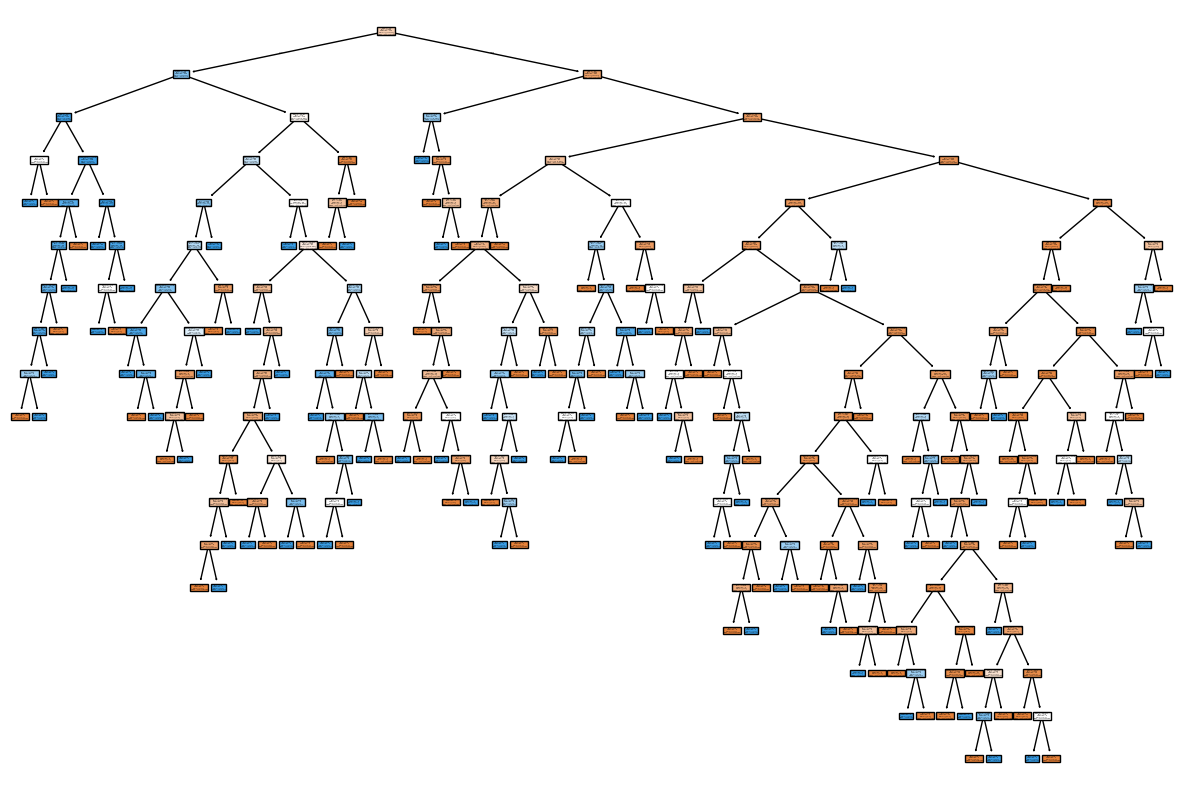

In [18]:
# Train_test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#model training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
#model prediction and evaluation

y_pred = model.predict(X_test)
#accuracy score
print("Accuracy:", accuracy_score(y_test,y_pred))
#confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test,y_pred))
#classification report
print("classification_report:\n",classification_report(y_test,y_pred))
#visualizing the decision tree

plt.figure(figsize=(15,10))
plot_tree(model,feature_names = X.columns,class_names=["Not Survived","Survived"],filled=True)
plt.show()





accuracy_score: 0.909
confusion_matrix:
 [[904  86]
 [ 96 914]]
classification_report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       990
           1       0.91      0.90      0.91      1010

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



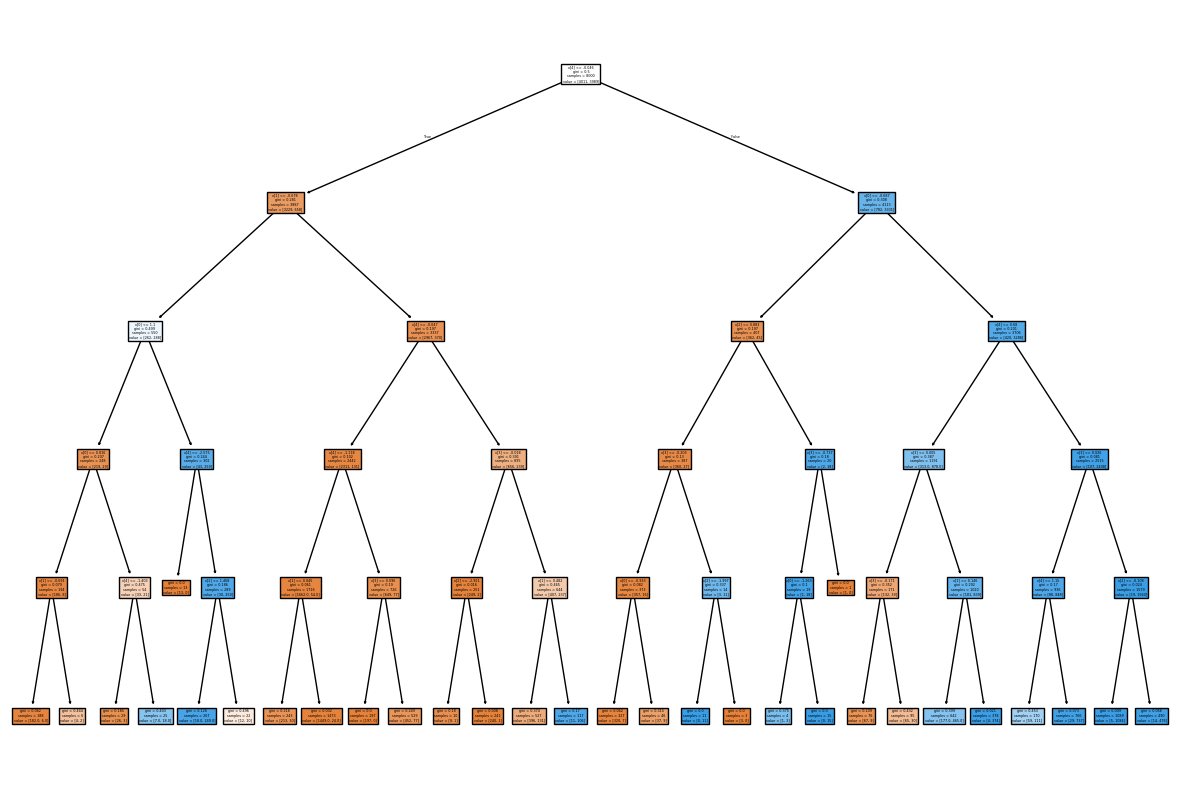

Feature Importances:
      Feature  Importance
4  Feature 4    0.623351
0  Feature 0    0.204635
1  Feature 1    0.095820
3  Feature 3    0.062382
2  Feature 2    0.013812


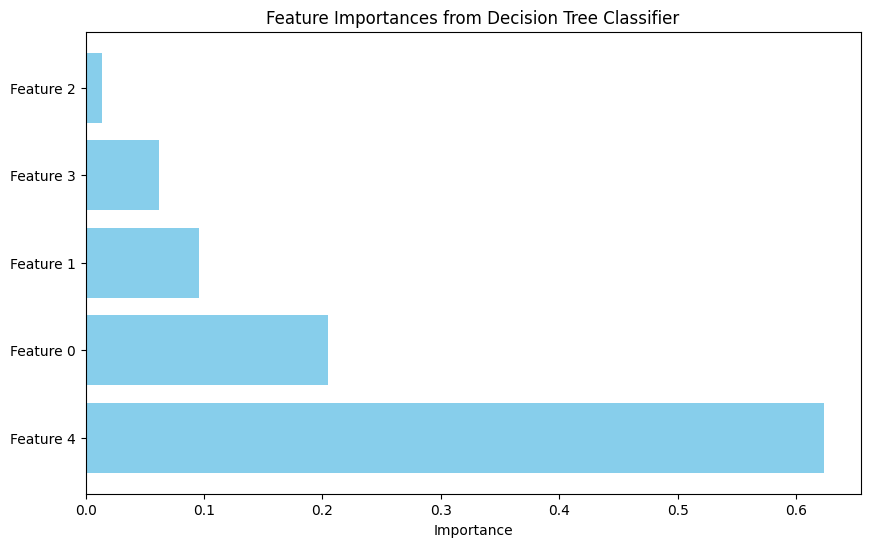

In [19]:
#synthetic dataset for binary classification
from sklearn.datasets import make_classification
#create a synthetic dataset
X_synth, y_synth = make_classification(n_samples = 10000,n_features=5,n_informative=3,n_classes=2,random_state=42)

#train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_synth, y_synth, test_size=0.2, random_state=42)

#model training 
model_synth = DecisionTreeClassifier(max_depth =5)
model_synth.fit(X_train,y_train)

#model prediction and evaluation
y_pred_synth = model_synth.predict(X_test)
#accuracy score
print("accuracy_score:",accuracy_score(y_test,y_pred_synth))  
#confusion matrix
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_synth)) 
#classification report 
print("classification_report:\n",classification_report(y_test,y_pred_synth))
#visualizing the decision tree
plt.figure(figsize=(15,10))
plot_tree(model_synth,filled=True)
plt.show()
# Feature importance
feature_importances = model_synth.feature_importances_
# Create a DataFrame for feature importances    
importance_df = pd.DataFrame({
    'Feature': [f'Feature {i}' for i in range(X_synth.shape[1])],
    'Importance': feature_importances
})
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Display the feature importances
print("Feature Importances:\n", importance_df)
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Decision Tree Classifier')  
plt.show()                                          

In [20]:
#✅ Step 2: Play with max_depth to See Overfitting/Underfitting
for d in range(1,11):
    model_synth = DecisionTreeClassifier(max_depth=d,random_state=42)
    model_synth.fit(X_train,y_train)
    acc = accuracy_score(y_test,model_synth.predict(X_test))
    print(f"depth:{d},Accuracy:{acc}")

depth:1,Accuracy:0.8115
depth:2,Accuracy:0.863
depth:3,Accuracy:0.8855
depth:4,Accuracy:0.893
depth:5,Accuracy:0.9085
depth:6,Accuracy:0.922
depth:7,Accuracy:0.929
depth:8,Accuracy:0.9375
depth:9,Accuracy:0.939
depth:10,Accuracy:0.942


In [21]:
## Hyperparameter tuning using Gridsearchcv
params = {
    "max_depth":[4,6,8,10],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,3,5],
    "criterion":['gini','entrophy']
    }
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),params,cv=5,scoring="accuracy")
grid.fit(X_train,y_train)

print("Best params from GridSearchCV:",grid.best_params_)
print("best Cross-validation Accuracy:",grid.best_score_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy of Tuned Model:", accuracy_score(y_test, y_pred_best))

Best params from GridSearchCV: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
best Cross-validation Accuracy: 0.9349999999999999
Accuracy of Tuned Model: 0.942


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validate

In [23]:
## to know overfitting and underfitting in my synthetic dataset 

#evaluation on test set 

print("🔹 Test Set Evaluation")
y_pred_test = model_synth.predict(X_test)
print("accuracy_score(Test):",accuracy_score(y_test,y_pred_test))
print("confusion_matrix (Test):\n", confusion_matrix(y_test, y_pred_test))
print("classification_report (Test):\n", classification_report(y_test, y_pred_test))

print("\n🔹 Train Set Evaluation")
y_pred_train = model_synth.predict(X_train)
print("accuracy_score(Train):",accuracy_score(y_train,y_pred_train))
print("confusion_matrix (Train):\n", confusion_matrix(y_train,y_pred_train))
print("classification_report (Train):\n", classification_report(y_train,y_pred_train))



🔹 Test Set Evaluation
accuracy_score(Test): 0.942
confusion_matrix (Test):
 [[949  41]
 [ 75 935]]
classification_report (Test):
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       990
           1       0.96      0.93      0.94      1010

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000


🔹 Train Set Evaluation
accuracy_score(Train): 0.976625
confusion_matrix (Train):
 [[3917   94]
 [  93 3896]]
classification_report (Train):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4011
           1       0.98      0.98      0.98      3989

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000

